# LAB 7 : Build a recommender system for online music store.
### Building a Recommendation System with Matrix Factorization using Singular Value Decomposition (SVD)

### Introduction

Recommendation systems are widely used in various online platforms to provide personalized recommendations to users based on their preferences and past interactions. Matrix factorization is a popular technique for building recommendation systems, where the user-item interaction matrix is decomposed into lower-dimensional matrices to capture latent factors.

### Algorithm: Singular Value Decomposition (SVD)

Singular Value Decomposition (SVD) is a matrix factorization technique that decomposes a matrix into three matrices representing orthogonal components:

Given a matrix $A$ of size $m \times n$:
- $U$ (left singular vectors) is an $m \times r$ orthogonal matrix.
- $\Sigma$ (diagonal matrix of singular values) is an $r \times r$ matrix.
- $V^T$ (right singular vectors) is an $r \times n$ orthogonal matrix.

The SVD algorithm decomposes the original matrix $A$ into the product of these three matrices:
$$ A = U \Sigma V^T $$

### Formulas:

1. **Matrix Factorization:**
$$ A \approx U_k \Sigma_k V_k^T $$
Where:
    - $U_k$ is the $m \times k$ matrix containing the first $k$ columns of $U$.
    - $\Sigma_k$ is the $k \times k$ matrix containing the first $k$ singular values.
    - $V_k^T$ is the $k \times n$ matrix containing the first $k$ rows of $V^T$.

2. **Mean Squared Error (MSE):**
$$ MSE = \frac{1}{mn} \sum_{i=1}^{m} \sum_{j=1}^{n} (A_{ij} - \hat{A}_{ij})^2 $$

### Steps:

1. **Loading and Inspecting the Data**: Load the dataset and inspect its structure.
2. **Exploratory Data Analysis (EDA)**: Analyze the distribution of playlists, artists, and tracks.
3. **Data Preparation**: Encode categorical variables and split the data into training and testing sets.
4. **Model Training**: Apply Singular Value Decomposition (SVD) to decompose the user-item interaction matrix.
5. **Model Evaluation**: Evaluate the model using Mean Squared Error (MSE).
6. **Recommendation Generation**: Generate top-N recommendations for users based on predicted ratings.

### Conclusion

In this notebook, we demonstrated how to build a recommendation system using matrix factorization with Singular Value Decomposition (SVD). By decomposing the user-item interaction matrix, we were able to generate personalized recommendations for users based on their past interactions with items. Further optimizations and enhancements can be explored to improve the performance and scalability of the recommendation system.


## Scrapping dataset from the link and saving in .csv format : 
[Link to dataset](https://raw.githubusercontent.com/Gurobi/modeling-examples/master/music_recommendation/user_playlist_data.csv)

In [1]:
import pandas as pd

# URL of the CSV file
url = "https://raw.githubusercontent.com/Gurobi/modeling-examples/master/music_recommendation/user_playlist_data.csv"

# Read the CSV data from the URL
df = pd.read_csv(url)

# Save the data to a CSV file named user_playlist.csv
df.to_csv("user_playlist.csv", index=False)

print("Data has been scraped and saved to user_playlist.csv")


Data has been scraped and saved to user_playlist.csv


## import libraries

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Loading and Inspecting the Data

### 1.1 Load the dataset from the provided CSV file.

In [3]:
df = pd.read_csv("user_playlist.csv")


### 1.2 Inspect the structure of the dataset to understand its attributes and overall information.

In [4]:
df.head(10)

,user_id,artist_id,artist,track,playlist
0,785,622,Elvis Costello,(The Angels Wanna Wear My) Red Shoes,HARD ROCK 2010
1,785,622,Elvis Costello,Alison,HARD ROCK 2010
2,785,622,Elvis Costello,Tramp The Dirt Down,HARD ROCK 2010
3,993,622,Elvis Costello,Don't Let Me Be Misunderstood,Everything at once
4,487,622,Elvis Costello,Alison,Home
5,300,622,Elvis Costello,Beautiful,Ángeles
6,155,622,Elvis Costello,Watching The Detectives - Single Version,Vergaarbaak
7,155,622,Elvis Costello,She,Voorbeschouwing
8,317,622,Elvis Costello,Deep Dark Truthful Mirror,We Are Hunted Paramore Chart Jan 12
9,697,622,Elvis Costello,Alison,All Time Great Songs


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740547 entries, 0 to 740546
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    740547 non-null  int64 
 1   artist_id  740547 non-null  int64 
 2   artist     740547 non-null  object
 3   track      740542 non-null  object
 4   playlist   740521 non-null  object
dtypes: int64(2), object(3)
memory usage: 28.2+ MB


In [6]:
df.isna().sum()

user_id       0
artist_id     0
artist        0
track         5
playlist     26
dtype: int64

### 1.3 Check for any missing values in the dataset and handle them if necessary.

In [7]:
df_cleaned = df.dropna()
df_cleaned.shape


(740516, 5)

In [8]:
df_cleaned.isna().sum()

user_id      0
artist_id    0
artist       0
track        0
playlist     0
dtype: int64

# Step 2: Exploratory Data Analysis (EDA)

### Step 2.1: Distribution of Playlists
We'll create a plot to visualize the top playlists in terms of their occurrence frequency. This will help us understand which playlists are the most popular among users.

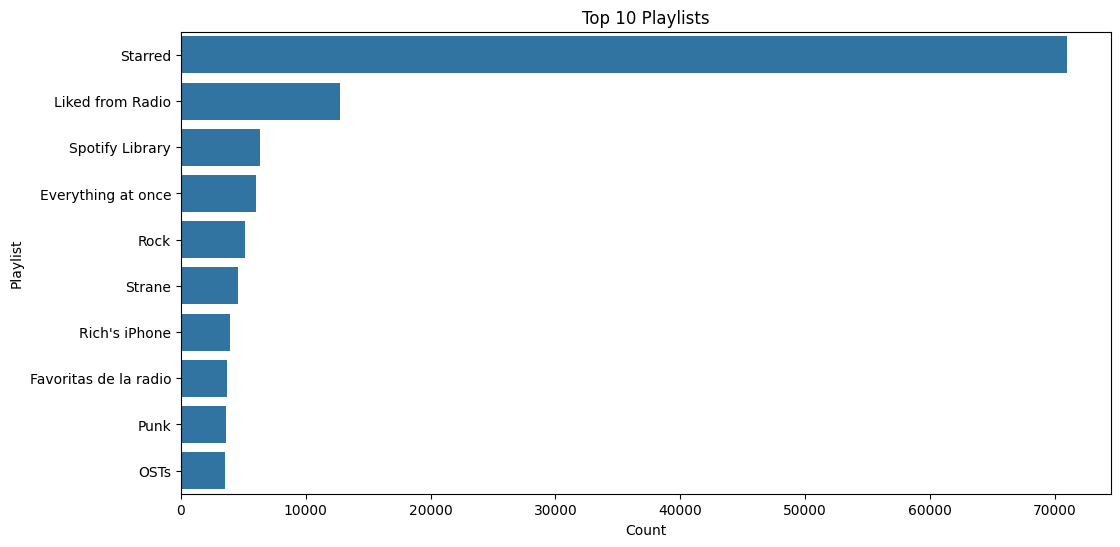

In [9]:
# Plot the distribution of playlists
plt.figure(figsize=(12, 6))
sns.countplot(y='playlist', data=df_cleaned, order=df_cleaned['playlist'].value_counts().index[:10])
plt.title('Top 10 Playlists')
plt.xlabel('Count')
plt.ylabel('Playlist')
plt.show()


### Step 2.2: Distribution of Artists
We'll create a plot to visualize the top artists based on the number of tracks associated with each artist. This will give us insights into which artists are the most prominent in the dataset.

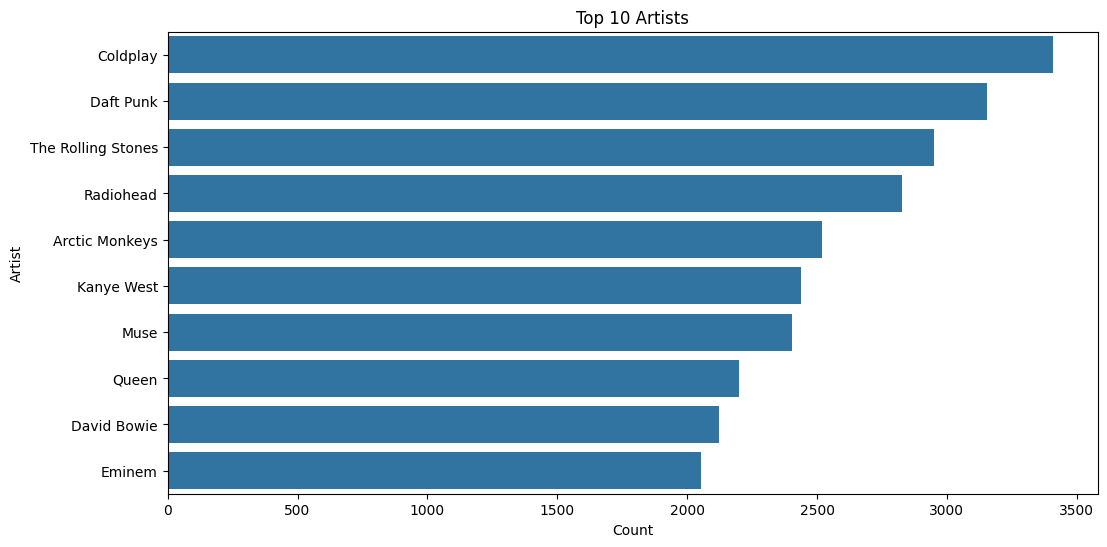

In [10]:
# Plot the distribution of artists
plt.figure(figsize=(12, 6))
sns.countplot(y='artist', data=df_cleaned, order=df_cleaned['artist'].value_counts().index[:10])
plt.title('Top 10 Artists')
plt.xlabel('Count')
plt.ylabel('Artist')
plt.show()

### Step 2.3: Distribution of Tracks
We will create a plot to visualize the top tracks based on the number of occurrences in the dataset. This will help us understand which tracks are the most popular or frequently listened to.

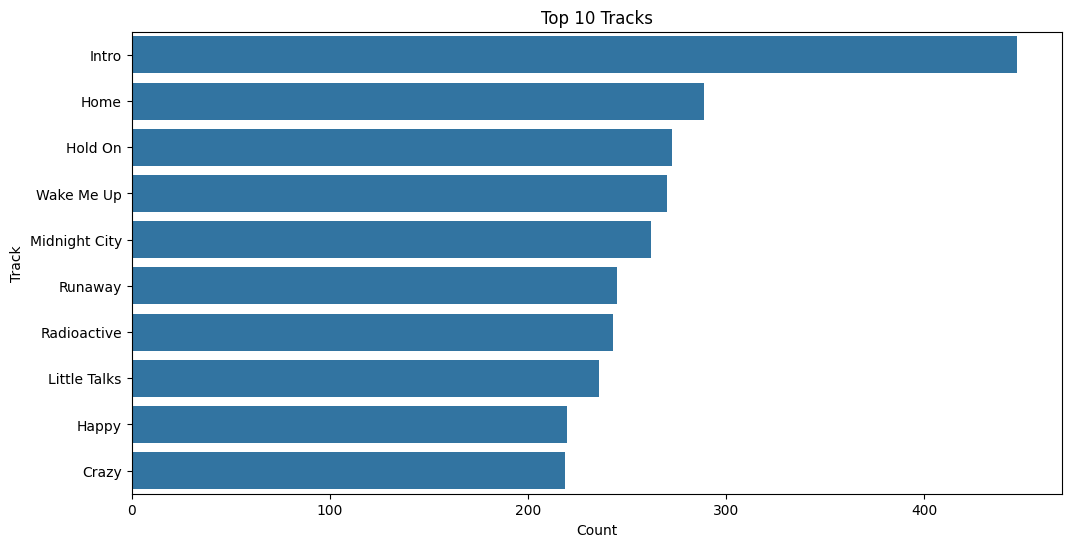

In [11]:
# Plot the distribution of tracks
plt.figure(figsize=(12, 6))
sns.countplot(y='track', data=df_cleaned, order=df_cleaned['track'].value_counts().index[:10])
plt.title('Top 10 Tracks')
plt.xlabel('Count')
plt.ylabel('Track')
plt.show()


# Step 3: Data Preparation
In this step, we'll prepare the data for building the recommender system. This involves transforming the data into the appropriate format for modeling. We'll use techniques such as encoding categorical variables and splitting the data into training and testing sets.

### Step 3.1: Encoding Categorical Variables
We'll encode the categorical variables user_id, artist_id, artist, track, and playlist into numerical representations using LabelEncoder.

In [12]:
# Initialize LabelEncoder
encoder = LabelEncoder()

In [13]:
# Encode categorical variables using .loc accessor
df_cleaned.loc[:, 'user_id'] = encoder.fit_transform(df_cleaned['user_id'])
df_cleaned.loc[:, 'artist_id'] = encoder.fit_transform(df_cleaned['artist_id'])
df_cleaned.loc[:, 'artist'] = encoder.fit_transform(df_cleaned['artist'])
df_cleaned.loc[:, 'track'] = encoder.fit_transform(df_cleaned['track'])
df_cleaned.loc[:, 'playlist'] = encoder.fit_transform(df_cleaned['playlist'])


### Step 3.2: Splitting the Data
Next, we'll split the data into training and testing sets. We'll use 80% of the data for training and 20% for testing.

In [14]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df_cleaned.drop(columns=['playlist'])
y = df_cleaned['playlist']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (592412, 4)
Shape of X_test: (148104, 4)
Shape of y_train: (592412,)
Shape of y_test: (148104,)


### Step 3.3: Creating User-Item Interaction Matrix

We'll create a user-item interaction matrix from the training data. This matrix will represent how users interact with items (tracks).

In [15]:
def create_interaction_matrix(data, user_col, item_col):
    interaction_matrix = pd.pivot_table(data, index=user_col, columns=item_col, aggfunc=lambda x: 1, fill_value=0)
    return interaction_matrix

In [16]:
interaction_matrix = create_interaction_matrix(X_train, 'user_id', 'track')

In [17]:
interaction_matrix

artist                                                                 \
track   0      1      2      3      4      5      6      7      8      9        
user_id                                                                         
0            0      0      0      0      0      0      0      0      0      0   
1            0      0      0      0      0      0      0      0      0      0   
2            0      0      0      0      0      0      0      0      0      0   
3            0      0      0      0      0      0      0      0      0      0   
4            0      0      0      0      0      0      0      0      0      0   
...        ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
1301         0      0      0      0      0      0      0      0      0      0   
1302         0      0      0      0      0      0      0      0      0      0   
1303         0      0      0      0      0      0      0      0      0      0   
1304         0      0      0      0      0      0      0      0      0      0   
1305         0      0      0      0      0      0      0      0      0      0   

         ... artist_id                                                   \
track    ...    234465 234466 234467 234468 234469 234470 234471 234472   
user_id  ...                                                              
0        ...         0      0      0      0      0      0      0      0   
1        ...         0      0      0      0      0      0      0      0   
2        ...         0      0      0      0      0      0      0      0   
3        ...         0      0      0      0      0      0      0      0   
4        ...         0      0      0      0      0      0      0      0   
...      ...       ...    ...    ...    ...    ...    ...    ...    ...   
1301     ...         0      0      0      0      0      0      0      0   
1302     ...         0      0      0      0      0      0      0      0   
1303     ...         0      0      0      0      0      0      0      0   
1304     ...         0      0      0      0      0      0      0      0   
1305     ...         0      0      0      0      0      0      0      0   

                       
track   234473 234474  
user_id                
0            0      0  
1            0      0  
2            0      0  
3            0      0  
4            0      0  
...        ...    ...  
1301         0      0  
1302         0      0  
1303         0      0  
1304         0      0  
1305         0      0  

[1306 rows x 410900 columns]

# Step 4: Model Training

### Step 4.1: Model Training - Matrix Factorization using Singular Value Decomposition (SVD)

In [18]:
import numpy as np

# Perform Singular Value Decomposition (SVD)
def svd_manual(matrix, k=50):
    # Perform Singular Value Decomposition
    U, Sigma, Vt = np.linalg.svd(matrix, full_matrices=False)
    
    # Keep only the top k singular values/vectors
    U = U[:, :k]
    Sigma = np.diag(Sigma[:k])
    Vt = Vt[:k, :]
    
    return U, Sigma, Vt

# Apply SVD to the interaction matrix
U, Sigma, Vt = svd_manual(interaction_matrix, k=50)


In [19]:
U

array([[-1.96425929e-02, -7.47368044e-03,  2.10669714e-02, ...,
        -9.39499000e-03,  1.30139245e-02, -2.25762424e-03],
       [-5.46216479e-04,  7.55504361e-05,  3.83820291e-04, ...,
        -1.70677573e-05,  6.71981012e-04,  3.05368591e-04],
       [-1.59270560e-02, -6.64194890e-03,  1.52430189e-02, ...,
        -2.74461935e-02, -8.65048746e-03, -5.56591369e-03],
       ...,
       [-1.01984254e-02, -6.43219165e-03, -2.90662587e-03, ...,
        -2.06742323e-03, -1.93458007e-03, -5.50618218e-03],
       [-7.94337009e-03, -1.25224415e-03,  1.40026334e-03, ...,
         1.05821054e-03,  1.48399031e-03, -6.15035352e-04],
       [-3.47026651e-03, -1.43982777e-03, -4.03824477e-05, ...,
        -4.02400087e-03,  1.36534632e-03, -2.22676898e-03]])

In [20]:
Sigma

array([[180.73282444,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        , 142.54915446,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        , 120.39138907, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,  56.55075908,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
         56.12007601,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,  55.93136919]])

In [21]:
Vt

array([[-3.72610654e-05, -1.65150237e-04, -9.41662794e-05, ...,
        -9.11281778e-05, -4.91614552e-04, -9.11281778e-05],
       [-1.77116460e-05,  1.31230601e-05,  3.65822750e-05, ...,
        -5.16113100e-05, -2.33572362e-04, -5.16113100e-05],
       [ 3.30446938e-05,  1.67170600e-04,  6.95986505e-05, ...,
         1.21229109e-04,  2.36515943e-05,  1.21229109e-04],
       ...,
       [-1.02650103e-04, -6.77782239e-04,  6.69286806e-05, ...,
        -1.78693885e-05,  2.81779419e-04, -1.78693885e-05],
       [-2.82493777e-04,  3.90865380e-04, -9.84862198e-06, ...,
         8.10652726e-05,  8.09748956e-04,  8.10652726e-05],
       [ 7.45696850e-05,  4.22252313e-04, -1.08397953e-05, ...,
         1.96709739e-05,  6.42848083e-04,  1.96709739e-05]])

### Step 4.2: Model Evaluation - Mean Squared Error (MSE)

In [22]:
# Calculate MSE between the predicted ratings and actual ratings
def calculate_mse(actual_matrix, predicted_matrix):
    # Compute Mean Squared Error
    mse = np.mean((actual_matrix - predicted_matrix) ** 2)
    return mse

# Reconstruct the original matrix using the SVD factors
predicted_ratings = np.dot(np.dot(U, Sigma), Vt)

# Compute MSE
mse = calculate_mse(interaction_matrix, predicted_ratings)
print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 0.001455697783707166


### Step 4.3: Recommendation Generation - Generate Top-N Recommendations
We'll generate top-N recommendations for each user based on the predicted ratings. To do this, we can define a function that takes the user ID, the matrices obtained from SVD (U and Vt), the DataFrame containing track names and artist IDs, and the number of recommendations (n) as inputs. This function will return the top-N recommendations with track names for the specified user.

- user_id: The ID of the user for whom recommendations are being generated.
- U: The left singular vectors obtained from SVD.
- Vt: The right singular vectors obtained from SVD.
- df_tracks: The DataFrame containing track names and artist IDs.
- n: The number of recommendations to generate for each user.

In [32]:
def generate_top_n_recommendations(user_id, U, Vt, df_tracks, n=10):
    # Get the index of the user
    user_index = user_id
    
    # Predict ratings for the user
    user_predicted_ratings = np.dot(U[user_index, :], Vt)
    
    # Get the indices of the top N items (songs) based on predicted ratings
    top_n_indices = np.argsort(user_predicted_ratings)[::-1][:n]
    
    # Get the track IDs corresponding to the top N indices
    top_n_track_ids = df_tracks.iloc[top_n_indices]['track'].values
    
    # Map track IDs to track names
    top_n_track_names = []
    track_mapping_values = []
    for track_id in top_n_track_ids:
        track_name = df_tracks[df_tracks['track'] == track_id]['track'].iloc[0]
        top_n_track_names.append(track_name)
        
        # Get the mapping value (predicted rating) for the track
        idx = np.where(df_tracks['track'] == track_id)[0][0]
        mapping_value = user_predicted_ratings[idx]
        track_mapping_values.append(mapping_value)
    
    # Create a DataFrame to store the recommendations and their mapping values
    recommendations_df = pd.DataFrame({
        'Track': top_n_track_names,
    })
    
    return recommendations_df


In [33]:
user_id = int(input("Enter user ID : "))
n_recommendations = int(input("How many songs do you want to recommend : "))
top_n_recommendations_df = generate_top_n_recommendations(user_id, U, Vt, df, n_recommendations)
print("Top", n_recommendations, "recommendations for user", user_id, ":")
print(top_n_recommendations_df)

Enter user ID : 5
How many songs do you want to recommend : 10
Top 10 recommendations for user 5 :
                                              Track
0                             Anyone’s Ghost (Live)
1                                    Smoke Detector
2                            Stop - 2011 - Remaster
3                                       The Undoing
4             Red Light Indicates Doors Are Secured
5                                      Livin' Thing
6  Cielito Lindo / Descarga Divine Explosion - Live
7                                      Of The Night
8                                    Mouth To Mouth
9                  God Only Knows - 1999 - Remaster
